# Atividade Estatística

## Informações Iniciais
- Análise estatística do banco de dados 'pinguins.csv' com o intuito de compreender e praticar os ensinamentos vistos em sala sobre Regressão Linear
- O banco de dados foi extraido do pacote 'dados' do R, seguindo as instruções da professora
- Variável Resposta = **'flipper_length_mm'**

## Carregando os dados e importando pacotes

In [1]:
#manipulação dos dados
import pandas as pd

#visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#divisão da base de dados entre treino e teste
from sklearn.model_selection import train_test_split

#modelo de regressão linear
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#avaliaçao da performance do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#carregando a base de dados na variavel dados
dados = pd.read_csv('pinguins.csv', sep=';')

In [3]:
type(dados)

pandas.core.frame.DataFrame

Aqui podemos ver que o tipo de variavel que foi criado, um DataFrame Pandas que é equivalente a uma tabela onde podemos ver todas as linhas e colunas

In [4]:
dados.shape

(344, 8)

Aqui temos uma visão inicial do que temos pela frente, uma "tabela" com 344 linhas e 9 colunas

In [5]:
dados.columns

Index(['especie', 'ilha', 'comprimento_bico', 'profundidade_bico',
       'comprimento_nadadeira', 'massa_corporal', 'sexo', 'ano'],
      dtype='object')

Aqui vemos todas as colunas do df, que nada mais são do que as variáveis a serem analisadas:
- especie: variavel qualitativa nominal que descreve a especie do pinguim
- ilha: variavel qualitativa nominal que descreve a ilha em que foi localizado o pinguim
- comprimento_bico: variavel quantitiva discreta que mede o comprimento do bico do pinguim em milimetros
- profundidade_bico: variavel quantitiva discreta que mede a expessura do bico do pinguim em milimetros
- comprimento_nadadeira: variavel quantitativa discreta que mede o tamanho da nadadeira do pinguim em milimetros
- massa_corporal: varaivel quantitativa discreta que mede o peso corporal do pinguim em gramas
- sexo: variavel qualitativa nominal que descreve o sexo do pinguim
- ano: variavel qualitativa que mostra o ano do estudo

## Tratamento dos dados

### Reordenar colunas

Primeiramente vamos reordenar as colunas para facilitar a compreensão associado a variavel resposta

In [6]:
ordem_colunas = ['comprimento_nadadeira', 'massa_corporal', 'comprimento_bico', 'profundidade_bico', 'especie', 'ilha', 'sexo', 'ano']

dados = dados.reindex(columns=ordem_colunas)

após reordenar vamos usar o metodo 'head()' para mostrar as 5 primeiras linhas do df e analisarmos o esqueleto inicial da base de dados

In [7]:
dados.head()

,comprimento_nadadeira,massa_corporal,comprimento_bico,profundidade_bico,especie,ilha,sexo,ano
1,181.0,3750.0,"39,1","18,7",Pinguim-de-adélia,Torgersen,macho,2007
2,186.0,3800.0,"39,5","17,4",Pinguim-de-adélia,Torgersen,fêmea,2007
3,195.0,3250.0,"40,3",18,Pinguim-de-adélia,Torgersen,fêmea,2007
4,NaN,NaN,NaN,NaN,Pinguim-de-adélia,Torgersen,NaN,2007
5,193.0,3450.0,"36,7","19,3",Pinguim-de-adélia,Torgersen,fêmea,2007


### Verificar e tratar valores faltantes

Quase sempre nossos bancos de dados irão vir com dados faltando ou algum outro tipo de erro. Cabe ao analista de dados tratar esses erros para prosseguir com um df completo e sem erros

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   comprimento_nadadeira  342 non-null    float64
 1   massa_corporal         342 non-null    float64
 2   comprimento_bico       342 non-null    object 
 3   profundidade_bico      342 non-null    object 
 4   especie                344 non-null    object 
 5   ilha                   344 non-null    object 
 6   sexo                   333 non-null    object 
 7   ano                    344 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 24.2+ KB


Aqui vemos que temos duas variaveis quantitativas que não estão no tipo adequado
- 'comprimento_bico'
- 'profundidade_bico'  
Iremos tratar essas variaveis para ela apresentar valores numericos

In [9]:
dados['comprimento_bico'] = pd.to_numeric(dados['comprimento_bico'].str.replace(',','.'))
dados['profundidade_bico'] = pd.to_numeric(dados['profundidade_bico'].str.replace(',','.'))

tratamos os dados tranformando em tipos numéricos e substituindo a ',' pelo '.' pois a sintaxe python aceita apenas o '.' como separador de digitos

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   comprimento_nadadeira  342 non-null    float64
 1   massa_corporal         342 non-null    float64
 2   comprimento_bico       342 non-null    float64
 3   profundidade_bico      342 non-null    float64
 4   especie                344 non-null    object 
 5   ilha                   344 non-null    object 
 6   sexo                   333 non-null    object 
 7   ano                    344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


Podemos observar que agora, todos os variaveis quantitativas tem um tipo adequado

Usando o método 'info()' vamos saber o tipo de dado de cada coluna junto com o numero de dados faltando
- observamos que o df tem 344 entradas e muitas colunas não possuem o mesmo numero de valores nao nulos
- Para termos uma visão mais detalhas vamos usar outro tipo de visualização

In [11]:
dados.isna().sum()

comprimento_nadadeira     2
massa_corporal            2
comprimento_bico          2
profundidade_bico         2
especie                   0
ilha                      0
sexo                     11
ano                       0
dtype: int64

aqui usamos o metodo 'isna()' para localizar os valores NaN em cada coluna e o método 'sum()' para somar todas as aparições e retornar o valor final por coluna

In [12]:
dados.dropna(axis=0, inplace=True)

utilizando o metodo 'dropna()' passando os parametros '0' e 'True' para remover todas as linhas com dados faltantes
- axis=0 determina o eixo que deve ser apagado, nesse caso apagamos as linhas
- inplace=True salva as alterações no proprio dataframe sem precisarmos criar outro

In [13]:
dados.isna().sum()

comprimento_nadadeira    0
massa_corporal           0
comprimento_bico         0
profundidade_bico        0
especie                  0
ilha                     0
sexo                     0
ano                      0
dtype: int64

Usamos novamente 'isna().sum()' e percebemos que todos os dados foram tratados


In [14]:
dados.shape

(333, 8)

Agora nosso df tem 333 linhas das 344 iniciais, ou seja 11 linhas foram removidas.
- Ou seja o **tamanho da amostra é de 333**

## Resumo Estatístico

In [15]:
dados.describe()

,comprimento_nadadeira,massa_corporal,comprimento_bico,profundidade_bico,ano
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,200.966967,4207.057057,43.992793,17.164865,2008.042042
std,14.015765,805.215802,5.468668,1.969235,0.812944
min,172.000000,2700.000000,32.100000,13.100000,2007.000000
25%,190.000000,3550.000000,39.500000,15.600000,2007.000000
50%,197.000000,4050.000000,44.500000,17.300000,2008.000000
75%,213.000000,4775.000000,48.600000,18.700000,2009.000000
max,231.000000,6300.000000,59.600000,21.500000,2009.000000


Usamos o metodo 'describe()' para exibir informaçoes estatisticas do df, como por exemplo:
- count: numero de registros, importante para sabermos o tamanho da amostra
- mean: media aritmética, devemos ficar atentos ao que ela representa, pois o resultando nem sempre reflete a realidade.
- std: desvio padrao, como os dados se dispersam em relação a média
- min: valor minimo, os valores min e max nos auxiliam para identificar a amplitude da amostra
- 25%: primeiro quartil, os quartis sao valores que nos mostram de que forma os dados estao distribuidos
- 50%: segundo quartil (**ou mediana**)
- 75%: terceiro quartil
- max: valor maximo

Obs: Podemos observar que apenas as váriaveis quantitativas foram retornadas

- A intenção ao usar o 'describe()' é observar, de maneira geral, se há algum valor fora do padrão e se os dados estão dispersos da médiana.

## Visualização inicial dos dados

Para visualizar mais de uma relação ao mesmo tempo usamos o metodo 'pairplot()' do pacote seaborn para criar uma matriz de scatterplots

In [1]:
sns.pairplot(dados, hue='comprimento_nadadeira')

NameError: name 'sns' is not defined

Olhando os graficos relacionados a nossa variavel resposta 'comprimento_nadadeira' podemos observar que 'massa_corporal' e 'comprimento_bico' tem uma possivel correlação linear.
para confirmarmos vamos fazer a matriz de correlação

## Correlação entre variaveis

Como temos variaveis qualitativas precisamos de um modo de "transformar" essas variaveis para fazer o calculo da correlação.  
Para fazer isso usaremos o método de codificação One-Hot no qual cada categoria qualitativa é transformada em uma nova variavel binária

In [17]:
dados_encoded = pd.get_dummies(dados, columns=['especie', 'ilha', 'sexo'])

aqui nós criamos variaveis dummy para as colunas categoricas e salvamos em um novo df 'dados_encoded'

In [18]:
dados_encoded.head()

,comprimento_nadadeira,massa_corporal,comprimento_bico,profundidade_bico,ano,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo,ilha_Biscoe,ilha_Dream,ilha_Torgersen,sexo_fêmea,sexo_macho
1,181.0,3750.0,39.1,18.7,2007,1,0,0,0,0,1,0,1
2,186.0,3800.0,39.5,17.4,2007,1,0,0,0,0,1,1,0
3,195.0,3250.0,40.3,18.0,2007,1,0,0,0,0,1,1,0
5,193.0,3450.0,36.7,19.3,2007,1,0,0,0,0,1,1,0
6,190.0,3650.0,39.3,20.6,2007,1,0,0,0,0,1,0,1


dando um head no novo df, podemos abservar as variaveis que foram criadas

Agora vamos de fato calcular a correlação usando o metodo de pearson que foi visto em sala

In [19]:
corr = dados_encoded.corr(method='pearson')

agora vamos dar uma olhada na correlação gerada

In [20]:
corr

,comprimento_nadadeira,massa_corporal,comprimento_bico,profundidade_bico,ano,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo,ilha_Biscoe,ilha_Dream,ilha_Torgersen,sexo_fêmea,sexo_macho
comprimento_nadadeira,1.000000,0.872979,0.653096,-0.577792,0.151068,-0.685947,-0.186175,0.866854,0.601126,-0.425459,-0.273304,-0.255169,0.255169
massa_corporal,0.872979,1.000000,0.589451,-0.472016,0.021862,-0.550479,-0.298622,0.821178,0.623702,-0.464666,-0.251369,-0.424987,0.424987
comprimento_bico,0.653096,0.589451,1.000000,-0.228626,0.032657,-0.836409,0.449098,0.488256,0.225174,0.032118,-0.367821,-0.344078,0.344078
profundidade_bico,-0.577792,-0.472016,-0.228626,1.000000,-0.048182,0.531342,0.323505,-0.822293,-0.626230,0.457326,0.265173,-0.372673,0.372673
ano,0.151068,0.021862,0.032657,-0.048182,1.000000,0.013882,-0.044591,0.023137,0.052894,-0.047304,-0.010370,0.000467,-0.000467
especie_Pinguim-de-adélia,-0.685947,-0.550479,-0.836409,0.531342,0.013882,1.000000,-0.447597,-0.658904,-0.332518,0.013443,0.458786,0.007961,-0.007961
especie_Pinguim-de-barbicha,-0.186175,-0.298622,0.449098,0.323505,-0.044591,-0.447597,1.000000,-0.377744,-0.496022,0.661894,-0.205351,0.004564,-0.004564
especie_Pinguim-gentoo,0.866854,0.821178,0.488256,-0.822293,0.023137,-0.658904,-0.377744,1.000000,0.761548,-0.570702,-0.302296,-0.012082,0.012082
ilha_Biscoe,0.601126,0.623702,0.225174,-0.626230,0.052894,-0.332518,-0.496022,0.761548,1.000000,-0.749398,-0.396949,-0.009201,0.009201
ilha_Dream,-0.425459,-0.464666,0.032118,0.457326,-0.047304,0.013443,0.661894,-0.570702,-0.749398,1.000000,-0.310248,0.000673,-0.000673


Aqui vemos que foi gerada uma tabela com todas as variaveis (inclusive as dummy)  
Para facilitar a visualização vamos transformar a tabela em um heatmap

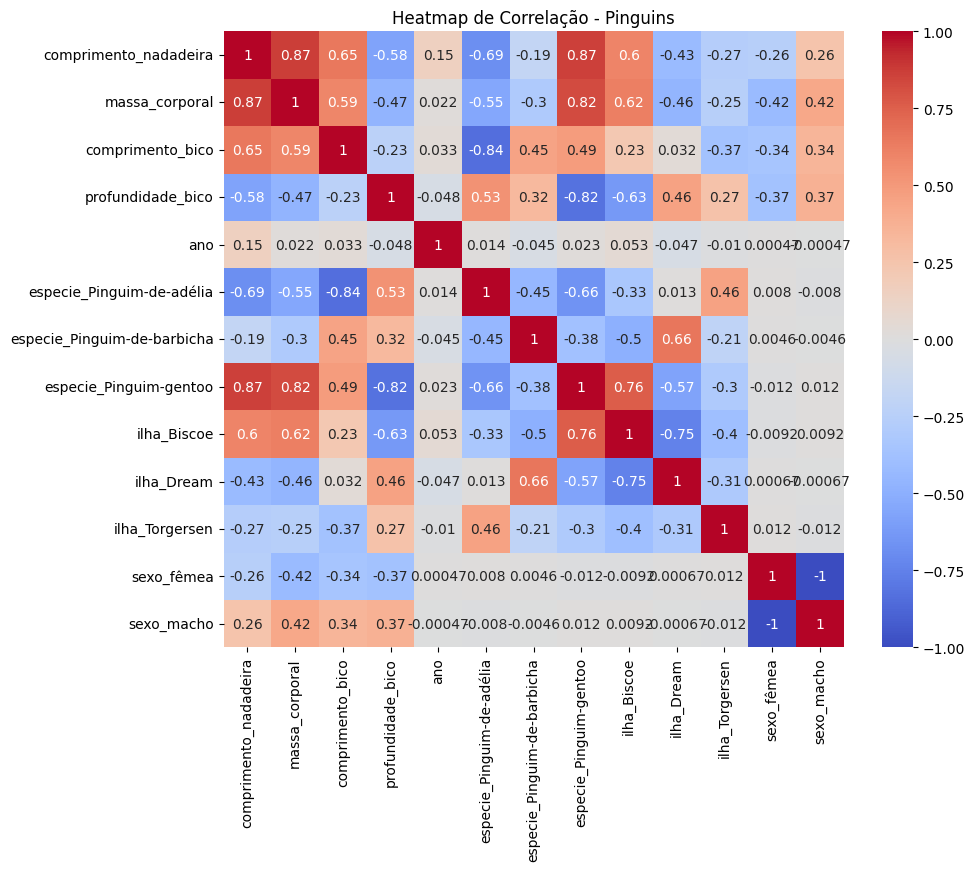

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação - Pinguins')
plt.show()

Ao analisar o mapa de correlação podemos extrair que:
- 'body_mass_g' e 'species_Gentoo' são as variáveis com maior coeficiente de correlação positiva
- 'bill_length_mm' e 'island_Biscoe' tambem tem um coeficiente positivo significativo
- 'bill_depth_mm' e 'species_Adelie' são  as variaveis com maior coeficiente de correlação negativa

Agora faremos um scatterplot (Diagrama de dispersão) entre 'body_mass_g' e a variavel resposta

<Axes: xlabel='comprimento_nadadeira', ylabel='massa_corporal'>

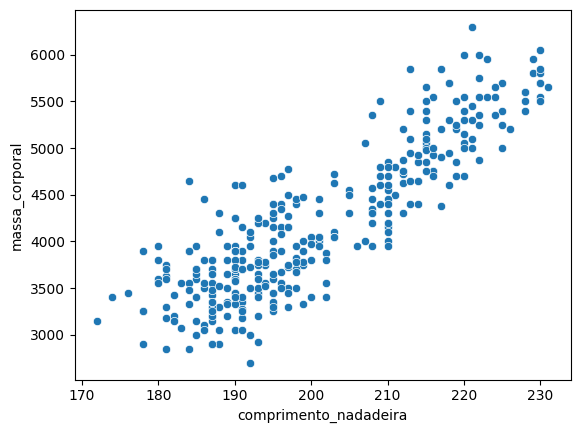

In [23]:
sns.scatterplot(x='comprimento_nadadeira', y='massa_corporal', data=dados_encoded)

Analisando o diagrama de dispersão podemos observar que existe uma correlaçção entre as duas variaveis

Agora vamos ao modelo de Regressão Linear

## Modelo de Regressão Linear

Vamos começar dividindo os dados entre dados de teste e dados de treino com uma proporção de 70:30

In [29]:
y = dados_encoded['comprimento_nadadeira']

x = dados_encoded['massa_corporal']

x = sm.add_constant(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [30]:
modelo = sm.OLS(y, x)

O metodo sm.OLS(y,x) é uma função do pacote Statsmodels, a função OLS (Ordinary Least Squares) é usada para ajustar um modelo de regressão linear, minimizando a soma dos erros quadráticos entre os valores previstos pelo modelo.  
A função sm.OLS(y, x) recebe dois argumentos principais:
y: Um array ou pandas Series representando a variavel dependente (variavel resposta ou alvo). É a variavel que voce deseja prever ou explicar com base nas variaveis independentes.
x: Um array ou pandas DataFrame representando as variaveis independentes (variaveis explicativas ou preditoras). São as variaveis que voce deseja usar para explicar ou prever a variavel dependente.  
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [31]:
treino = modelo.fit()

usamos o metodo 'fit()' para treinar o modelo e logo após o 'summary()' para mostrar os resultados do treinamento

In [32]:
treino.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     comprimento_nadadeira   R-squared:                       0.762
Model:                               OLS   Adj. R-squared:                  0.761
Method:                    Least Squares   F-statistic:                     1060.
Date:                   Fri, 26 Apr 2024   Prob (F-statistic):          3.13e-105
Time:                           16:42:59   Log-Likelihood:                -1112.1
No. Observations:                    333   AIC:                             2228.
Df Residuals:                        331   BIC:                             2236.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            137.0396      1.999     68.562      0.000     133.108     140.972
massa_corporal     0.0152      0.000     32.562      0.000       0.014       0.016
==============================================================================
Omnibus:                       11.941   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.696
Skew:                          -0.474   Prob(JB):                      0.00175
Kurtosis:                       2.872   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nesse resultado podemos observar várias informaçoes uteis como por exemplo:
R², Estatistica-F, Graus de liberdade, os coeficientes, entre outros.

Agora iremos analisar a medida de MAE (Mean Absolute Error) e MSE (Mean Squared Error), tanto na base de treino quanto na base de testes

In [34]:
# Imprime as métricas de MAE
print(f'Métrica MAE na base de treino: {mean_absolute_error(y_train, treino.predict(x_train))}')
print(f'Métrica MAE na base de teste: {mean_absolute_error(y_test, treino.predict(x_test))}')

Métrica MAE na base de treino: 5.682017688639979
Métrica MAE na base de teste: 5.290017924437433


Idealmente, você deseja que o MAE seja baixo tanto nos dados de treinamento quanto nos dados de teste, indicando que o modelo é capaz de fazer previsões precisas em ambos.

Se o MAE é muito baixo nos dados de treinamento, mas significativamente mais alto nos dados de teste, é um sinal de overfitting.
Se o MAE é alto em ambos os conjuntos de dados (treinamento e teste), indica que o modelo é muito simples (underfitting) ou há um problema com a modelagem.

In [36]:
# Imprime as métricas de MSE
print(f'Métrica MSE na base de treino: {mean_squared_error(y_train, treino.predict(x_train))}')
print(f'Métrica MSE na base de teste: {mean_squared_error(y_test, treino.predict(x_test))}')


Métrica MSE na base de treino: 49.944525403885216
Métrica MSE na base de teste: 38.78950724317884


Plotando o grafico da regressão

In [39]:
intercepto, coeficiente = modelo.params

AttributeError: 'OLS' object has no attribute 'params'

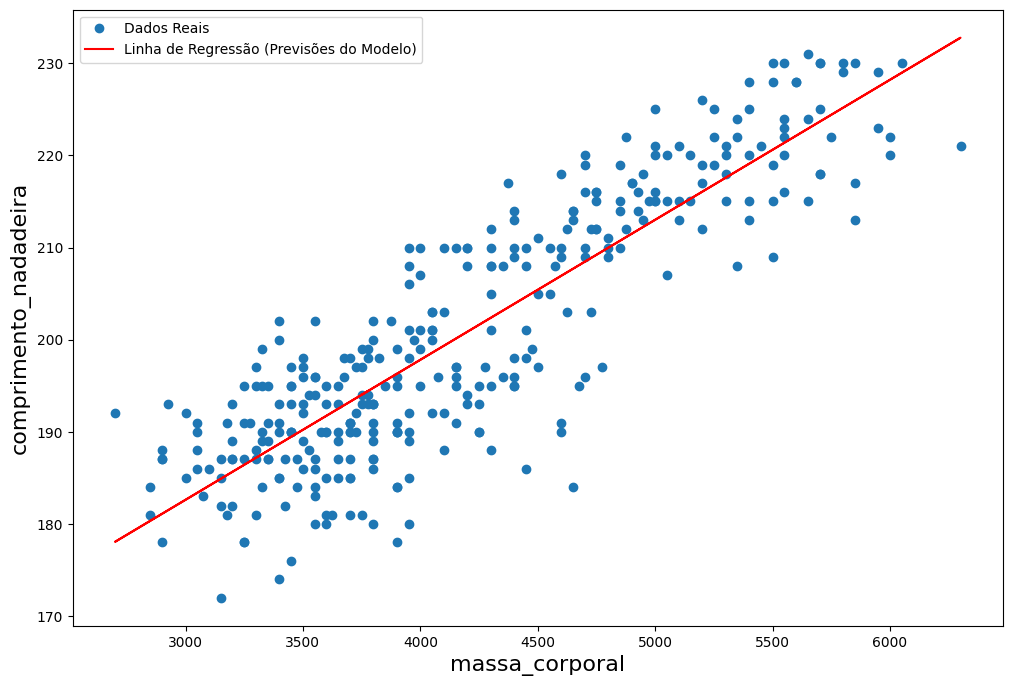

In [38]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel("massa_corporal", size = 16)
plt.ylabel("comprimento_nadadeira", size = 16)
plt.plot(x["massa_corporal"], y, "o", label = "Dados Reais")
plt.plot(x["massa_corporal"], treino.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()

## Premissas do Modelo

Numa Regressão Linear, 4 premissas precisam ser satisfeitas:
1. Linearidade
2. Normalidade
3. Observações Independentes
4. Homocedasticidade

Nós ja checamos a linearidade ao fazer o scatterplot.  
A normalidade e a homecedasticidade focam na distribuição dos erros. Por isso, para checar essas premissas, usaremos os residuos para aproximar os erros.

Para checar facilmente a premissa do modelo e criar visualizações relevantes, vamos precisar  